# Part 6: Naive collaborative filtering

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import matrix_factorization
from surprise import BaselineOnly
from sklearn.metrics import mean_squared_error
from math import sqrt
from surprise import accuracy
import timeit
import os
import pandas as pd
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
#if you ant to save plots, make this variable True
savePlots = False

In [103]:
file_path = os.path.expanduser('/Users/vijayravi/Documents/UCLA/Coursework/2018Winter/dataMining/projects/project3/resources/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

In [104]:
with open('ratings.csv', 'r') as f:
        next(f)
        reader = csv.reader(f)
        print reader
        userRating = np.zeros(671)
        count = np.zeros(671)
        for row in reader:
            userRating[int(row[0])-1] +=  float(row[2])
            count[int(row[0])-1] += 1
          

        for i in range(len(userRating)):
             userRating[i] /= count[i]

In [105]:
def predFunc(testData):
    NBdata = np.zeros(len(testData))
    trueData = np.zeros(len(testData))
    for i in range(len(NBdata)):
        NBdata[i]= userRating[int(testData[i][0])-1]
        trueData[i] = testData[i][2]
                             
    return NBdata,trueData

In [106]:

def rmseFunc(actual, pred):
    rms = sqrt(mean_squared_error(actualValues, NBPedictions))
    return rms

In [107]:
with open('ratings.csv', 'r') as f:
        reader = csv.reader(f)
        user_id = []
        movie_id = []
        rating = []
        
        for row in reader:
            user_id.append(row[0])
            movie_id.append(row[1])
            rating.append(row[2])
movie_id = movie_id[1:]
rating = rating[1:]
user_id = user_id[1:]

unique_movies = list(set(movie_id))
unique_movies = np.asfarray(unique_movies,int)

In [108]:
movie_numbers_with_less_than_two_ratings = []
for i in unique_movies:
    indexes = []
    for j in range(len(movie_id)):
        if(movie_id[j] == str(int(i))):
            indexes.append(j)
    if len(indexes) <= 2:
        movie_numbers_with_less_than_two_ratings.append(i)
movie_ints = [int(i) for i in movie_numbers_with_less_than_two_ratings]

In [109]:
movie_numbers_with_less_than_five_ratings = []
for i in unique_movies:
    indexes = []
    for j in range(len(movie_id)):
        if(movie_id[j] == str(int(i))):
            indexes.append(j)
    if len(indexes) < 5:
        movie_numbers_with_less_than_five_ratings.append(i)

In [110]:
variance = []
for i in unique_movies:
    indexes = []
    ratings = []
    for j in range(len(movie_id)):
        if(movie_id[j] == str(int(i))):
            indexes.append(j)
    for k in indexes:
        ratings.append(float(rating[k]))
    variance.append(np.var(ratings))

In [111]:
five_ratings_and_variance = []
for i in range(len(unique_movies)):
    if unique_movies[i] not in movie_numbers_with_less_than_five_ratings:
        if variance[i] > 2:
            five_ratings_and_variance.append(i)
            
five_ratings_and_variance_int = [int(i) for i in five_ratings_and_variance]

In [112]:
def trim_movies_variance(testset):
    removed_testset = []
    #print(len(testset))
    for j in range(len(testset)):
        if int(testset[j][1]) in five_ratings_and_variance_int:
            #print('yes!')
            removed_testset.append(testset[j])
    return removed_testset

def trim_movies_greater_than_2(testset):
    removed_testset = []
    #print(len(testset))
    for j in range(len(testset)):
        if int(testset[j][1]) not in movie_ints:
            #print('yes!')
            removed_testset.append(testset[j])
    return removed_testset

def trim_movies_less_or_equal_to_2(testset):
    removed_testset = []
    #print(len(testset))
    for j in range(len(testset)):
        if int(testset[j][1]) in movie_ints:
            #print('yes!')
            removed_testset.append(testset[j])
    return removed_testset

### Question 30:

In [113]:
test_rmse_avg_full = []
test_rmse = []
for trainset, testset in kf.split(data):

    NBPedictions, actualValues = predFunc(testset)
    foldRMSE = rmseFunc(actualValues, NBPedictions)
    test_rmse_avg_full.append(foldRMSE)
avgRMSE = np.mean(test_rmse_avg_full)  

In [114]:
print "Average RMSE using 10-fold cross validation is", avgRMSE

Average RMSE using 10-fold cross validation is 0.955399969420791


### Question 31

In [115]:

for trainset, testset in kf.split(data):
    removed_testset = trim_movies_greater_than_2(testset)
    NBPedictions, actualValues = predFunc(removed_testset)
    foldRMSE = rmseFunc(actualValues, NBPedictions)
    test_rmse_avg_full.append(foldRMSE)
avgRMSE = np.mean(test_rmse_avg_full)  
print "Average RMSE for Popular Trimming is", test_rmse_avg_full

Average RMSE for Popular Trimming is [0.9479159376226929, 0.9500132617603072, 0.953401214486397, 0.9559401990417812, 0.9544891147813362, 0.939590553581257, 0.9590135332746302, 0.9648749754740222, 0.9705340033017279, 0.9582269008837585, 0.9633877930220439, 0.9534990871954718, 0.9617683598897666, 0.9495135411874591, 0.9512487602241385, 0.955765050663135, 0.9421844494222529, 0.9509958060190219, 0.9434086050291037, 0.9494066382035112]


In [4]:
rmse = [0.9479159376226929, 0.9500132617603072, 0.953401214486397, 0.9559401990417812, 0.9544891147813362, 0.939590553581257, 0.9590135332746302, 0.9648749754740222, 0.9705340033017279, 0.9582269008837585, 0.9633877930220439, 0.9534990871954718, 0.9617683598897666, 0.9495135411874591, 0.9512487602241385, 0.955765050663135, 0.9421844494222529, 0.9509958060190219, 0.9434086050291037, 0.9494066382035112]
avgRMSE = np.mean(rmse)
print avgRMSE

0.9537588892531907


### Question 32

In [116]:

for trainset, testset in kf.split(data):
    removed_testset = trim_movies_less_or_equal_to_2(testset)
    NBPedictions, actualValues = predFunc(removed_testset)
    foldRMSE = rmseFunc(actualValues, NBPedictions)
    test_rmse_avg_full.append(foldRMSE)
avgRMSE = np.mean(test_rmse_avg_full)  
print "Average RMSE for UnPopular Trimming is", test_rmse_avg_full

Average RMSE for UnPopular Trimming is [0.9479159376226929, 0.9500132617603072, 0.953401214486397, 0.9559401990417812, 0.9544891147813362, 0.939590553581257, 0.9590135332746302, 0.9648749754740222, 0.9705340033017279, 0.9582269008837585, 0.9633877930220439, 0.9534990871954718, 0.9617683598897666, 0.9495135411874591, 0.9512487602241385, 0.955765050663135, 0.9421844494222529, 0.9509958060190219, 0.9434086050291037, 0.9494066382035112, 0.9804306322514957, 1.040306220792542, 0.9222658064906768, 0.9941900727804233, 1.0262018452384185, 1.046562836748772, 1.0152266712317328, 1.0110297082882507, 1.053919930595165, 1.0080449912419482]


In [5]:
rmse =[0.9479159376226929, 0.9500132617603072, 0.953401214486397, 0.9559401990417812, 0.9544891147813362, 0.939590553581257, 0.9590135332746302, 0.9648749754740222, 0.9705340033017279, 0.9582269008837585, 0.9633877930220439, 0.9534990871954718, 0.9617683598897666, 0.9495135411874591, 0.9512487602241385, 0.955765050663135, 0.9421844494222529, 0.9509958060190219, 0.9434086050291037, 0.9494066382035112, 0.9804306322514957, 1.040306220792542, 0.9222658064906768, 0.9941900727804233, 1.0262018452384185, 1.046562836748772, 1.0152266712317328, 1.0110297082882507, 1.053919930595165, 1.0080449912419482]
avgRMSE = np.mean(rmse)
print avgRMSE

0.9724452166907747


### Question 33

In [120]:

for trainset, testset in kf.split(data):
    removed_testset = trim_movies_variance(testset)
    NBPedictions, actualValues = predFunc(removed_testset)
    foldRMSE = rmseFunc(actualValues, NBPedictions)
    test_rmse_avg_full.append(foldRMSE)
avgRMSE = np.mean(test_rmse_avg_full)  
print "Average RMSE for Variance Trimming is", avgRMSE

Average RMSE for Variance Trimming is 1.013036192443812


### ROC Plotting

In [121]:

trainset, testset = train_test_split(data, test_size=.10)

NBPedictions, actualValues = predFunc(testset)

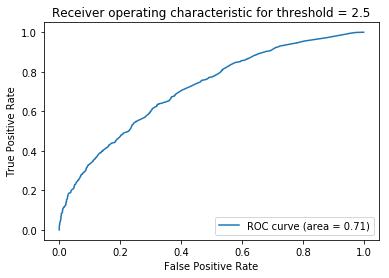

 Area under the curve for Threshold =  2.5 is,  0.7148580956680047


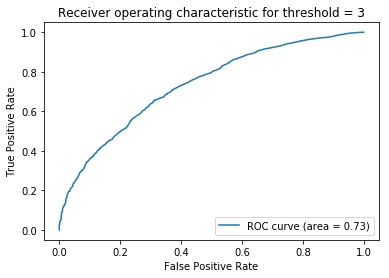

 Area under the curve for Threshold =  3 is,  0.7322390714994484


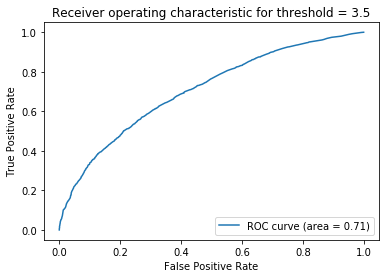

 Area under the curve for Threshold =  3.5 is,  0.7067691960171931


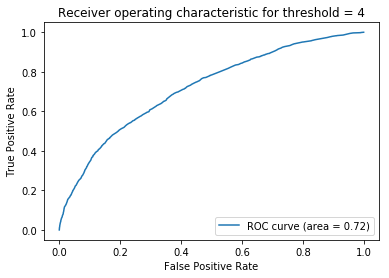

 Area under the curve for Threshold =  4 is,  0.7179993075359645


In [123]:

predValue = []
thresholds = [2.5,3,3.5,4]
for threshold in thresholds:
    trueValue = []
    for i in range(len(testset)):
        if testset[i][2] >= threshold: #threshold
            trueValue.append(1)
        else:
            trueValue.append(0)


    fpr, tpr, thresholds = roc_curve(trueValue,NBPedictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for threshold = ' + str(threshold))
    plt.legend(loc="lower right")
    plt.show()
    if savePlots:
         plt.savefig("roc_naiveBayes", format='png') 
    plt.show()
    print " Area under the curve for Threshold = ",threshold, "is, ", roc_auc